In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_parquet("../data/processed/nitrate_00_train_data.parquet")

In [13]:
print("🔍 Shape:", df.shape)
display(df.head())


🔍 Shape: (703450, 8)


,lat,lon,depth,temperature_00,salinity_00,oxygen_00,nitrate_00,phosphate_00
57,-77.5,-178.5,0,-1.403,NaN,367.215,18.625,1.351
58,-77.5,-178.5,5,-1.174,NaN,368.993,18.471,1.358
59,-77.5,-178.5,10,-1.248,NaN,368.318,20.164,1.387
60,-77.5,-178.5,15,-1.273,NaN,366.832,20.064,1.364
61,-77.5,-178.5,20,-1.264,NaN,358.110,20.915,1.368


In [14]:
print("\nTypy kolumn:")
print(df.dtypes)

print("\nBraki danych (NaN):")
print(df.isna().sum())


Typy kolumn:
lat               float64
lon               float64
depth               int32
temperature_00    float64
salinity_00       float64
oxygen_00         float64
nitrate_00        float64
phosphate_00      float64
dtype: object

Braki danych (NaN):
lat                   0
lon                   0
depth                 0
temperature_00    36177
salinity_00       51441
oxygen_00         11181
nitrate_00            0
phosphate_00      36811
dtype: int64


In [15]:
display(df.describe(include=np.number).T)

,count,mean,std,min,25%,50%,75%,max
lat,703450.0,0.603857,43.016465,-77.500,-34.500,-0.500,34.500,89.500
lon,703450.0,-6.521979,106.124721,-179.500,-89.500,-19.500,85.500,179.500
depth,703450.0,368.086346,422.882897,0.000,55.000,150.000,550.000,1500.000
temperature_00,667273.0,10.665655,8.767954,-2.149,3.570,8.464,17.120,33.633
salinity_00,652009.0,34.757546,1.380142,2.848,34.353,34.702,35.165,39.405
oxygen_00,692269.0,208.482168,83.935788,0.000,174.150,210.648,268.681,449.350
nitrate_00,703450.0,17.058993,13.460414,-0.082,3.652,15.294,29.591,49.980
phosphate_00,666639.0,1.282978,0.913489,0.000,0.450,1.135,2.090,9.758


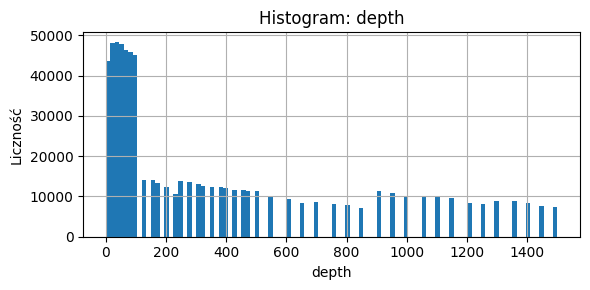

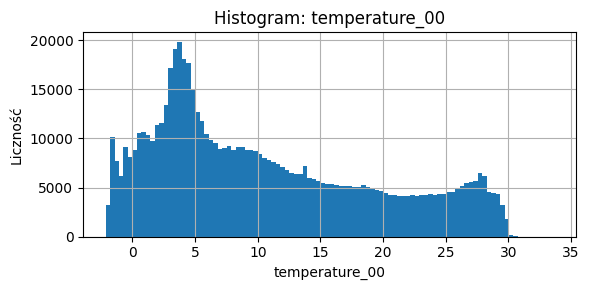

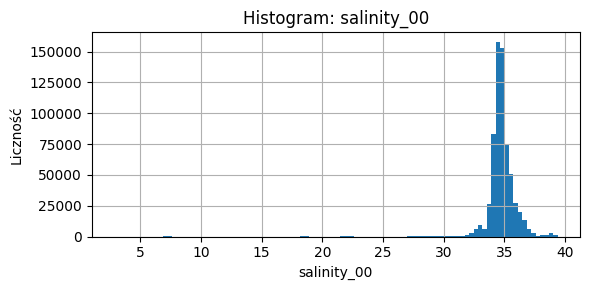

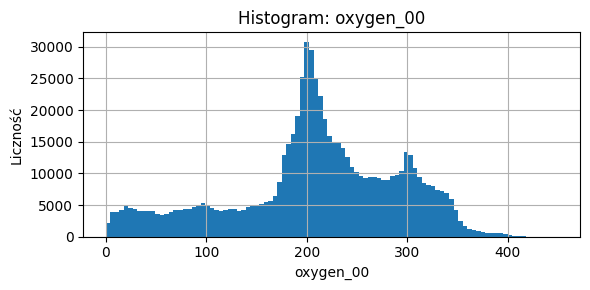

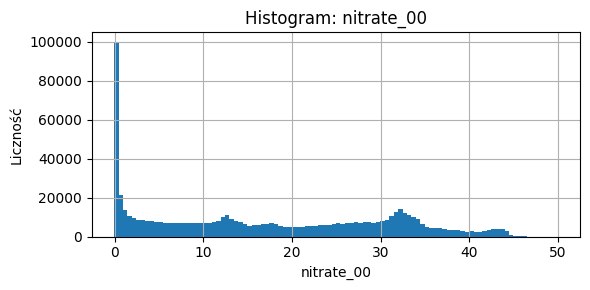

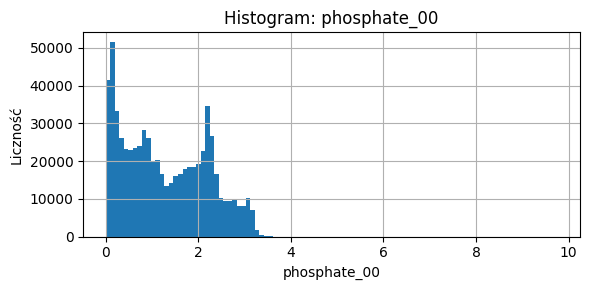

In [16]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    if col in ['lat', 'lon']: continue
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=100)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

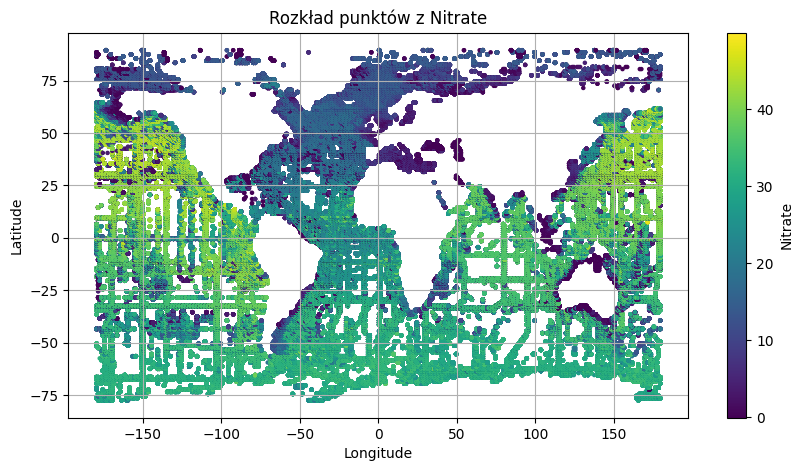

In [17]:
plt.figure(figsize=(10, 5))
subset = df.dropna(subset=["lat", "lon", "nitrate_00"])
sc = plt.scatter(subset["lon"], subset["lat"], c=subset["nitrate_00"], cmap="viridis", s=5)
plt.colorbar(sc, label="Nitrate")
plt.title("Rozkład punktów z Nitrate")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

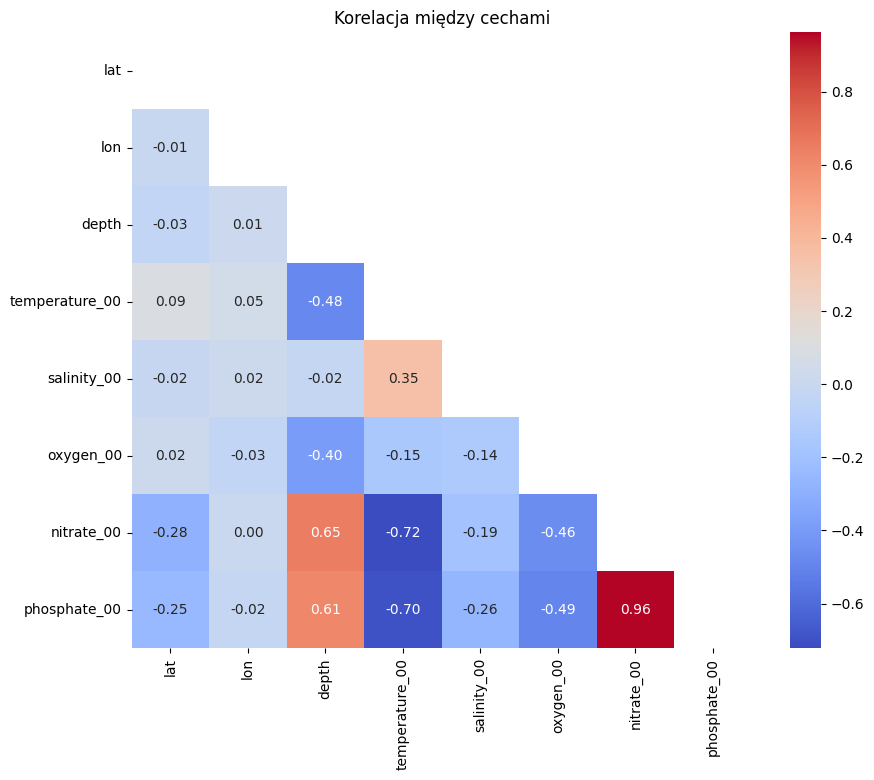

In [18]:
corr = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=np.triu(corr))
plt.title("Korelacja między cechami")
plt.show()

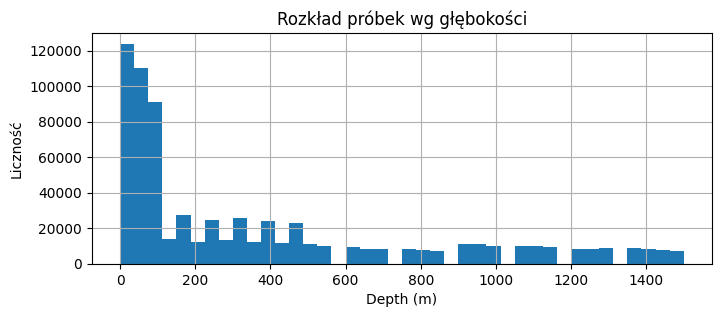

In [19]:
if "depth" in df.columns:
    plt.figure(figsize=(8, 3))
    df["depth"].hist(bins=40)
    plt.title("Rozkład próbek wg głębokości")
    plt.xlabel("Depth (m)")
    plt.ylabel("Liczność")
    plt.grid(True)
    plt.show()